# Regression Model for Boston Housing Price prediction


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import plotly.express as px
import seaborn as sns

In [3]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [165]:

boston=load_boston()
features=boston.feature_names
bos=pd.DataFrame(boston.data,columns=features)

In [129]:
bos.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [166]:
target=boston.target

In [167]:
bos['MEDV']=target

In [132]:
bos.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


# Dataset Description:
ref: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

    Variables
    There are 14 attributes in each case of the dataset. They are:

        CRIM - per capita crime rate by town
        ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
        INDUS - proportion of non-retail business acres per town.
        CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
        NOX - nitric oxides concentration (parts per 10 million)
        RM - average number of rooms per dwelling
        AGE - proportion of owner-occupied units built prior to 1940
        DIS - weighted distances to five Boston employment centres
        RAD - index of accessibility to radial highways
        TAX - full-value property-tax rate per  USD10,000  
        PTRATIO - pupil-teacher ratio by town
        B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        LSTAT - % lower status of the population
        MEDV - Median value of owner-occupied homes in USD1000's

In [10]:
bos.shape

(506, 14)

### Data Shape: There are 506 rows , 14 columns, 13 input features and 1 target feature

In [11]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
## There are non-null 14 features and all are of float64 type data. 
## There is no missing value as seen from the above info, further investigation needed to confirm

In [15]:
bos.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [16]:
bos.tail(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [17]:
bos.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


From the above description following insights are drawn:
1. Feature ZN is 0 for 25th percentile and 50th percentile
2. CHAS feature is also 0 for 25th, 50th, 75th pecentile,
** since ZN and CHAS are zero for most of the training data, these may not be useful for predicting the price

In [18]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Initial model

In [20]:
from sklearn.linear_model import LinearRegression

# Fitting the model
base_model = LinearRegression()
base_model.fit(boston.data, boston.target)

# Returning the R^2 for the model
base_r2 = base_model.score(boston.data, boston.target)
print('R^2: {0}'.format(base_r2))


R^2: 0.7406426641094095


In [35]:
def residuals_computation(model,features,target):
    """
    Generate predictions on the features and computes residuals
    """
    predictions=model.predict(features)
    df_predictions=pd.DataFrame({'Actual':target,'Predicted':predictions})
    df_predictions['Residuals']=abs(df_predictions['Actual']) -abs(df_predictions['Predicted'])
    
    return df_predictions

# ASSUMPTIONS TESTING

# LINEARITY 

1. Linear regression model assumes that there is a linear relationship between features and labels to fit the line. If there is not linear relationship then the model prediction will be inaccurate and underfitting
2. Methods to detect: Scatter plot or pairplot
** if linearity assumption is violated: transform predictors(features) to either polynomial or add additional variables .

In [40]:
def check_linearity(model,features,target):
    """ Linearity assumes that there is a linear relationship between the predictors and
               the response variable. 
    """
    print(" Linearity Testing: \n")
    print("Scatterplot of actual Vs Predicted, Predictions should follow the diagonal line")
    
    df_residuals=residuals_computation(model,features,target)
    #Plt scatterplot
    sns.lmplot(x='Actual',y='Predicted', data=df_residuals,fit_reg=False,size=8)
    line_range=np.arange(df_residuals.min().min(),df_residuals.max().max())
    plt.plot(line_range,line_range,color='r')
    plt.title("Actual Vs Predicted")
    plt.show()
    

 Linearity Testing: 

Scatterplot of actual Vs Predicted, Predictions should follow the diagonal line


C:\Users\Jhv\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


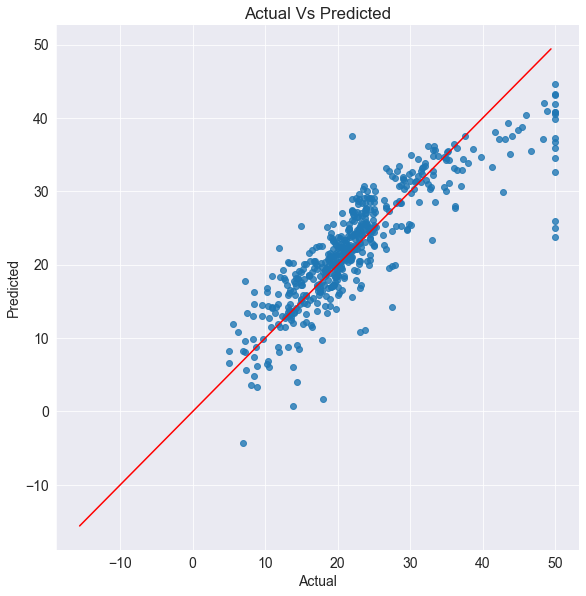

In [41]:
check_linearity(base_model,boston.data,boston.target)

There is no perfect linear relationship near lower and higher values

# 2. Normality Test

To adopt linear regression, we assume residual or error terms are normally distributed. To ensure our assumptions are correct we need to do Normality test. 
1. There are many reasons for non normality: featurs or targets are not normally distributed or due to the presence of outliers normality is disturbed.
2. Violaiton of the assumptions could lead to increase or decrease of CI
3. Normality test can be done by using distplot(histogram) or QQ plot or from p-value from Andrson-Darling test 
** If there is violation of normality assumption it can be fixed by adopting non linear transformation, removing outliers and or removing few features.

In [51]:
from statsmodels.stats.diagnostic import normal_ad

In [98]:
def normality_check(model,features,target,pvalue_threshold=0.05):
    """
    Normality assumption is to ensure residuals are normally distributed,
    if not feature transformation is requried. 
    Violation may result in issues with confidence intervals
    
    """
    print(" Residual or error terms are normally distributed \n")
    df_residuals=residuals_computation(model,features,target)
    print("Normality check using Anderson-Darling test")
    
    #find p value from the test
    p_value=normal_ad(df_residuals['Residuals'])[1]
    
    print("p-value from the normality test is {}".format(p_value))
    
    if p_value<pvalue_threshold:
        print("Residuals are not normally distributed")
    else:
        print("Residuals are normally distributed")
    
    plt.subplots(figsize=(12,8))
    plt.title("Distribution of Residuals")
    sns.distplot(df_residuals['Residuals'])
    plt.show()
    
    

 Residual or error terms are normally distributed 

Normality check using Anderson-Darling test
p-value from the normality test is 8.311128328200776e-25
Residuals are not normally distributed


C:\Users\Jhv\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


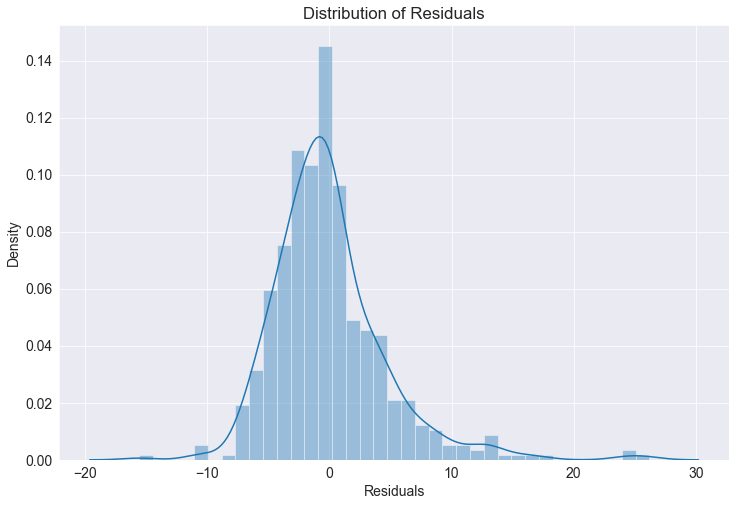

In [99]:
normality_check(base_model,boston.data,boston.target)

In [55]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot
def plot_QQ_Normality(model,features,target):
    df_residuals=residuals_computation(model,features,target)
    ## Plotting the QQ plot
    fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
    qqplot(df_residuals['Residuals'], line = 's' , ax = ax)
    plt.ylabel('Residual Quantiles')
    plt.xlabel('Ideal Scaled Quantiles')
    plt.title(' distribution of Residual Errors')
    plt.show()

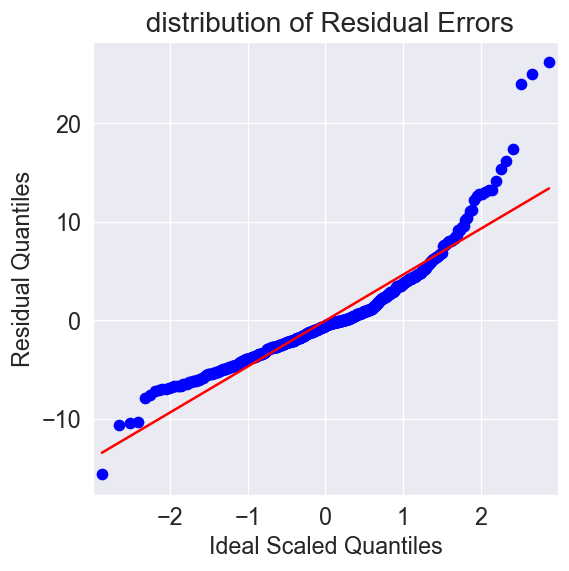

In [56]:
plot_QQ_Normality(base_model,boston.data,boston.target)

Assumption not satisfied in all the three methods

# 3. Multicollinearity Check

1. Regression models assumes that the features are not correlated with each other. If this assumptions is violated it disturbs the interpretability of the model [nterpretability is the degree to which a human can understand the cause of a decision. Another one is: Interpretability is the degree to which a human can consistently predict the model's result ]
2. When there is collinearity, our assumption of linear regression where increase of feature value results in change in target value keeping all other features const, this will not be possible when features are correlated.
3. Methods to detect: Heatmap, VIF
4. Highly correlated features can be removed as per VIF value or perform dimensionality reduction

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
def multicollinearity_check(model,features,label,feature_names=None):
    """
    Multicollinearity: Linear Regression models assumes that predictors or features are not correlated with each other,
    if so then interpretability of the model is distrubed. VIF and heatmap are used for checking .
    To fix features with high VIF can be removed and dimensionality reduction method can be applied
    
    """
    print("Multicollinearity Check\n")
    plt.figure(figsize=(15,10))
    sns.heatmap(pd.DataFrame(features,columns=feature_names).corr().round(2),annot=True,cmap='RdYlGn')
    plt.title("Features Correlation")
    plt.show()
    
    print("VIF > 10 indicates multicollinearity is present")
    
    VIF=[variance_inflation_factor(features,i) for i in range(features.shape[1])]
    for idx,vif in enumerate(VIF):
        print('{0}:{1}'.format(feature_names[idx],vif))
    
    multicollinearity_present=sum([1 for vif in VIF if vif>10])
    multicollinearity_high_present=sum([1 for vif in VIF if vif>100])
    if multicollinearity_high_present == 0:
        if multicollinearity_present == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')
    

Multicollinearity Check



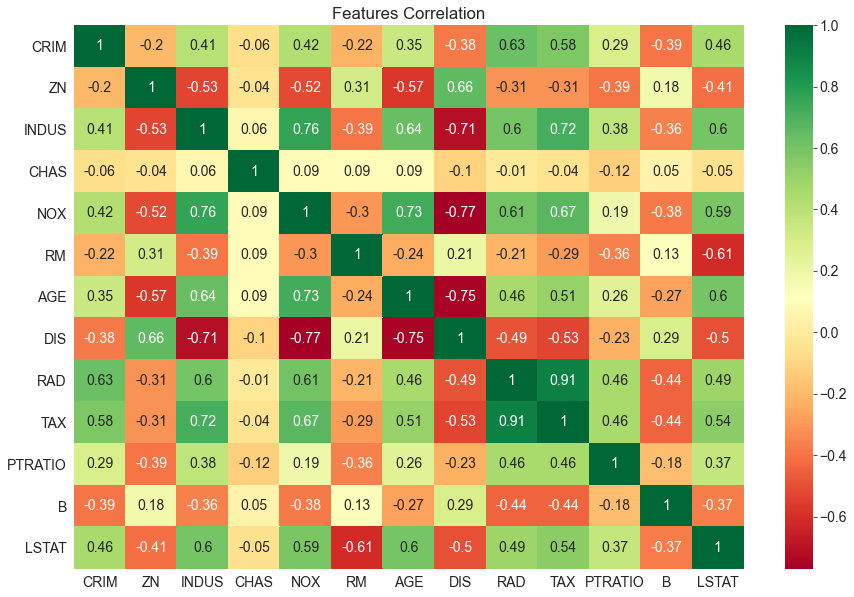

VIF > 10 indicates multicollinearity is present
CRIM:2.1003728199615233
ZN:2.8440132669462646
INDUS:14.485757706539331
CHAS:1.1529518589418777
NOX:73.89494652814788
RM:77.94828304638538
AGE:21.38685048994314
DIS:14.6996523837492
RAD:15.167724857920897
TAX:61.227274009649456
PTRATIO:85.02954731061801
B:20.10494263622909
LSTAT:11.102024772203539
Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [77]:
multicollinearity_check(base_model, boston.data, boston.target, boston.feature_names)

# Autocorrelation of Residuals or Error Terms Test

Linear Regression model assumes no autocorrelation of the error terms.  If autocorrelation is present it indicates that
there is some information not captured by the model
1. It can happen when model is under or over predicting in certain conditions due to violations of other assumptions .
2. Model estimation will be impacted if there is a violation of this assumption
3. Durbin-Watson to determine type of correlation and also Ljunbox test for autocorrelation can be used
4. Additional transformation or adding other variables can fix.

In [79]:
 from statsmodels.stats.stattools import durbin_watson

In [84]:
def autocorrelation_check(model,features,label):
    
    """
    Autocorrelation: Assumption is that there is no autocorrelation in residual terms, if there is any then there is a pattern not caputred in the model (ex depency on previous data)
    The possible solution to fix the violation is to add a lag variable of either target or features
    
    """
    
    print(' Autocorrelation Test', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = residuals_computation(model, features, label)

    print('0 to 2 is positive autocorrelation')
    print('2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [85]:
autocorrelation_check(base_model, boston.data, boston.target)

 Autocorrelation Test 

0 to 2 is positive autocorrelation
2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.0715916506006815
Signs of positive autocorrelation 

Assumption not satisfied


## Autocorrelation test from statsmodel

In [86]:
import statsmodels.api as sm


In [87]:
df_results = residuals_computation(base_model, boston.data, boston.target)

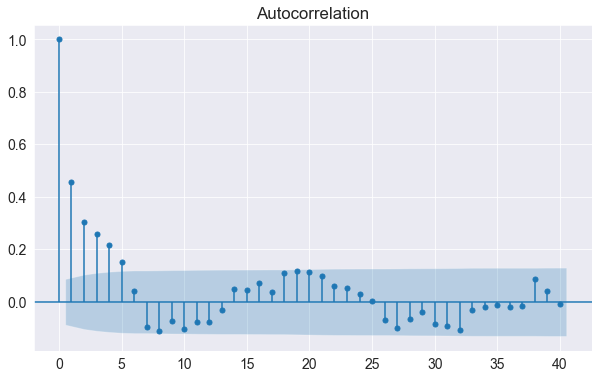

In [88]:
sm.graphics.tsa.plot_acf(df_results['Residuals'], lags=40)
plt.show()

There is  autocorrelation as spikes around 0 to 5 out of confidence region

# Homoscedasticity Test

1. When there is no even variance within error terms
2. This can occur when model gives more weightage to subset of data where the error variance is largest
3. Confidence intervals will be disturbed
4. residuals uniform plot can be used to check
5. Method to fix: weighted least squares regression model or log transformation of dependent feature

In [92]:
def homoscedasticity_check(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print(' Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = residuals_computation(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

 Homoscedasticity of Error Terms 

Residuals should have relative constant variance


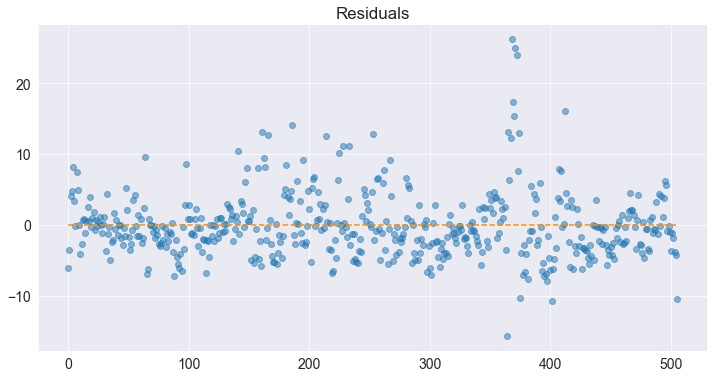

In [93]:
homoscedasticity_check(base_model,  boston.data, boston.target)

Checking Heteroscedasticity using Goldfeld Quandt test
* Null Hypothesis=Error terms are homoscedastic
* Alternative Hypothesis= Error terms are heteroscedastic

In [97]:
import statsmodels
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name=['F statistic', 'p-value']
test=sms.het_goldfeldquandt(df_results.Residuals,boston.data)
lzip(name,test)

[('F statistic', 2.0112913590016035), ('p-value', 4.3115242837785714e-08)]

p-value is less than 0.05 hence reject null hypothesis that means accept alternative hypothesis error terms not homoscedastic and they are hetroscedastic

# Summary of Assumption Tests
1. ZN & CHAS have most values zeroes
2. Linearity, Normality, Autocorrelation,Homoscedasticity test showed assumption failed

3. Except CRIM,ZN, CHAS other features showed high VIF (LSTAT~ 11 could be considered for model)

# Exploratory Data Analysis

### Univariate Analysis
1. CRIM - per capita crime rate by town

In [103]:
bos.CRIM.describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

median is less than mean hence left skewed

In [104]:
fig=px.histogram(bos,x='CRIM',marginal='box',nbins=45,title='Distribution of CRIM')
fig.update_layout(bargap=0.1)
fig.show()

There are many outliers in the CRIM feature

In [105]:
fig=px.histogram(bos,x='ZN',marginal='box',color_discrete_sequence=['red'],title='Distribution of ZN')
fig.update_layout(bargap=0.1)
fig.show()

ZN has median < mean and has outliers

In [106]:
fig=px.histogram(bos,x='INDUS',marginal='box',nbins=45,title='Distribution of INDUS')
fig.update_layout(bargap=0.1)
fig.show()

Indus is not normally distributed.
No outliers in the data
Non retail business is more uniform near lower range

In [107]:
fig=px.histogram(bos,x='CHAS',marginal='box',nbins=45,title='Distribution of CHAS')
fig.update_layout(bargap=0.1)
fig.show()

Not many houses bound by river

In [108]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [109]:
fig=px.histogram(bos,x='NOX',marginal='box',nbins=45,title='Distribution of NOX')
fig.update_layout(bargap=0.1)
fig.show()

In [133]:
fig = px.histogram(bos, 
                   x='MEDV', 
                   marginal='box', 
                   nbins=50,
                   color_discrete_sequence=['green'], 
                   title='PRICE Distribution')
fig.update_layout(bargap=0.1)
fig.show()

PRICE is centered around median more, though there are outliers approximately from the graphical view normally distributed

In [134]:
fig=px.histogram(bos,x='RM',marginal='box',color_discrete_sequence=['red'],title='Distribution of RM')
fig.update_layout(bargap=0.1)
fig.show()

In [135]:
fig=px.histogram(bos,x='AGE',marginal='box',color_discrete_sequence=['grey'],title='Distribution of AGE')
fig.update_layout(bargap=0.1)
fig.show()

Age of the houses from 80 to 100 are more compared to lower age houses

In [136]:
fig=px.histogram(bos,x='DIS',marginal='box',color_discrete_sequence=['cyan'],title='Distribution of DIS')
fig.update_layout(bargap=0.1)
fig.show()

More houses with less distance to prime cities

In [137]:
#'RAD', 'TAX',
    #   'PTRATIO', 'B', 'LSTAT',
fig=px.histogram(bos,x='RAD',marginal='box',nbins=25,color_discrete_sequence=['grey'],title='Distribution of RAD')
fig.update_layout(bargap=0.1)
fig.show()

In [138]:
fig=px.histogram(bos,x='TAX',marginal='box',nbins=25,color_discrete_sequence=['grey'],title='Distribution of TAX')
fig.update_layout(bargap=0.1)
fig.show()

More houses in the cities where tax is around 300 and also as an exception most houses where tax is maximum may be due to job opportunities

In [139]:
#'RAD', 'TAX',
    #   'PTRATIO', 'B', 'LSTAT',
fig=px.histogram(bos,x='PTRATIO',marginal='box',nbins=25,color_discrete_sequence=['yellow'],title='Distribution of PTRATIO')
fig.update_layout(bargap=0.1)
fig.show()

more houses where pupil to teacher ratio is more

In [117]:
#'RAD', 'TAX',
    #   'PTRATIO', 'B', 'LSTAT',
fig=px.histogram(bos,x='B',marginal='box',nbins=20,color_discrete_sequence=['yellow'],title='Distribution of B')
fig.update_layout(bargap=0.1)
fig.show()

In [118]:
fig=px.histogram(bos,x='LSTAT',marginal='box',nbins=20,color_discrete_sequence=['maroon'],title='Distribution of  LSTAT')
fig.update_layout(bargap=0.1)
fig.show()

## outlier in features

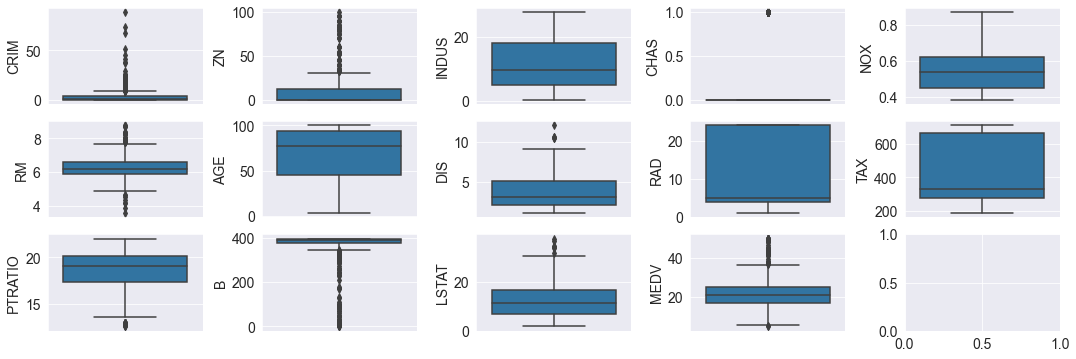

In [119]:
fig,ax=plt.subplots(ncols=5,nrows=3,figsize=(15,5))
ax=ax.flatten()
index=0
for i in bos.columns:
    sns.boxplot(y=i,data=bos,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5)
plt.show()

Columns CRIM, RM, DIS, PTRATIO, B, LSTAT and MEDV have outliers. ZN and CHAS can be removed as most of the values are zeros and ar hightly skewed.

## Outlier Treatment:
remove outliers which are > max and <min
                                         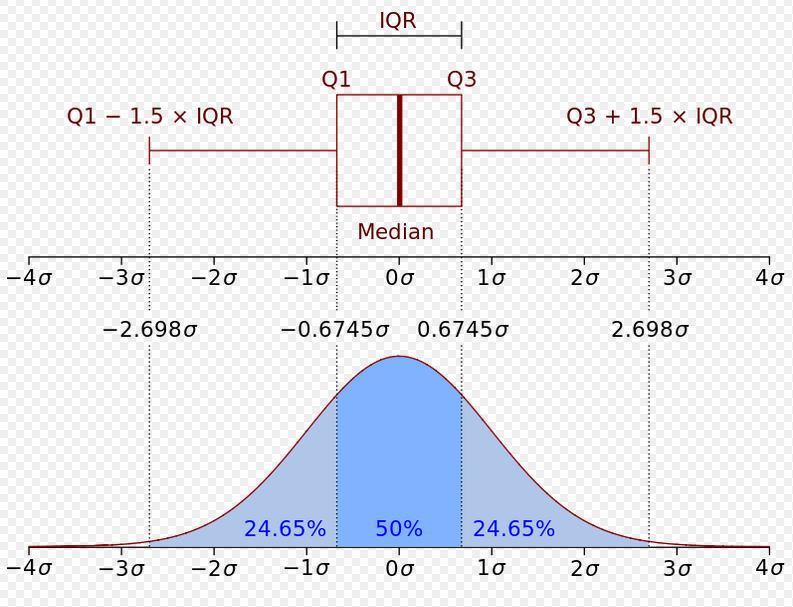

In [168]:
bos.drop(['ZN','CHAS'],axis=1,inplace=True)

In [169]:
bos_copy=bos.copy()


In [170]:
for i in bos.columns:
    bos.sort_values(by=i,ascending=True)
    q1,q3=np.percentile(bos[i],[25,75])
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    outliers=bos[i][(bos[i]<lb)|(bos[i]>ub)]
    per_outliers=(outliers.count()/bos[i].count())*100
    print("Percentage of outliers in {} is {}".format(i,per_outliers))
    cols=['CRIM',  'RM',  'DIS',  'PTRATIO','B', 'LSTAT', 'PRICE']
  
    
    
    

Percentage of outliers in CRIM is 13.043478260869565
Percentage of outliers in INDUS is 0.0
Percentage of outliers in NOX is 0.0
Percentage of outliers in RM is 5.928853754940711
Percentage of outliers in AGE is 0.0
Percentage of outliers in DIS is 0.9881422924901186
Percentage of outliers in RAD is 0.0
Percentage of outliers in TAX is 0.0
Percentage of outliers in PTRATIO is 2.9644268774703555
Percentage of outliers in B is 15.217391304347828
Percentage of outliers in LSTAT is 1.383399209486166
Percentage of outliers in MEDV is 7.905138339920949


In [171]:
bos.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
       'B', 'LSTAT', 'MEDV'],
      dtype='object')

## Correlation
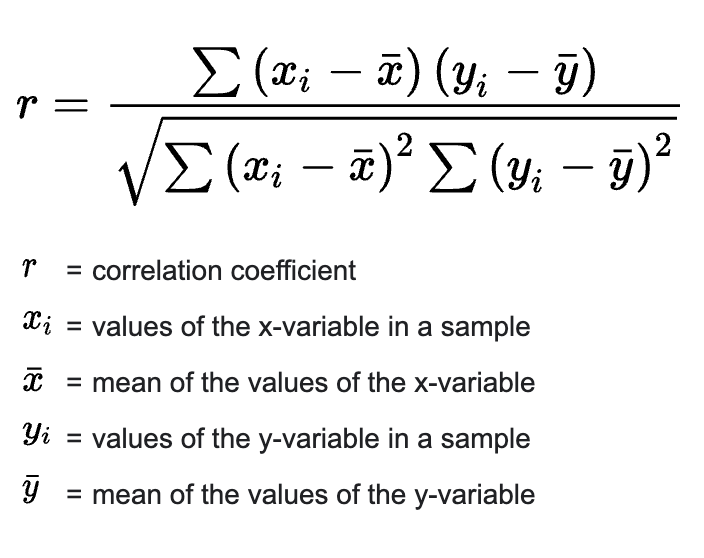

Text(0.5, 1.0, 'Correlation Matrix of Boston Housing Features')

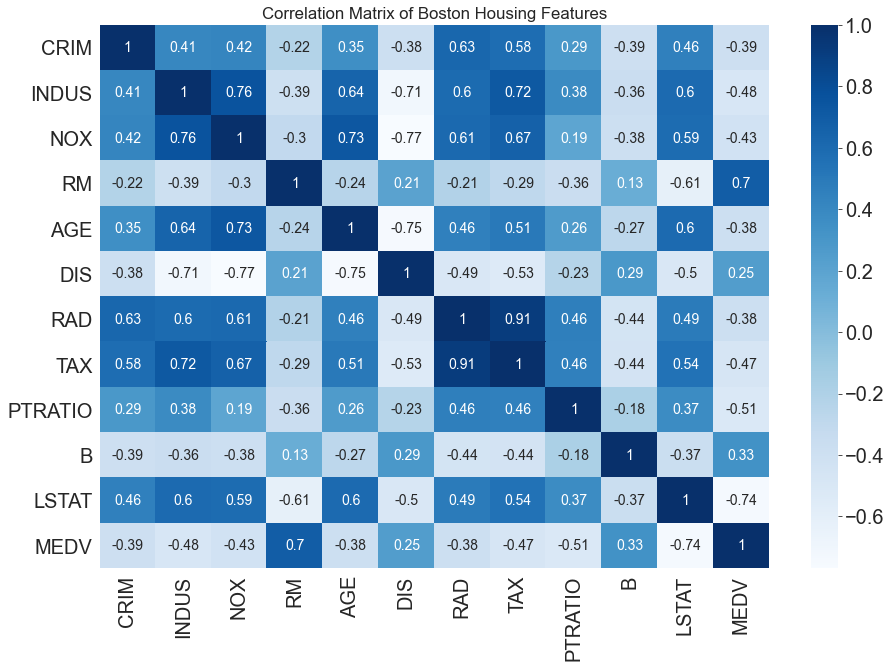

In [172]:
plt.figure(figsize=(15,10))
sns.heatmap(bos.corr(method='pearson'),cmap='Blues',annot=True)
plt.title("Correlation Matrix of Boston Housing Features")

1. TAX & RAD, INDus & NOX, AGE&NOX, NOX &DIS (-ve), NOX&TAX are correlated.
2. LSTAT and RM are highly correlated with MEDV

In [173]:
bos.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
       'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [174]:
bos.drop(['CRIM', 'INDUS', 'NOX','AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B'],axis=1)

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2
...,...,...,...
501,6.593,9.67,22.4
502,6.120,9.08,20.6
503,6.976,5.64,23.9
504,6.794,6.48,22.0


In [175]:
bos.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
       'B', 'LSTAT', 'MEDV'],
      dtype='object')

<ipython-input-180-cf2c2352db24>:7: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.



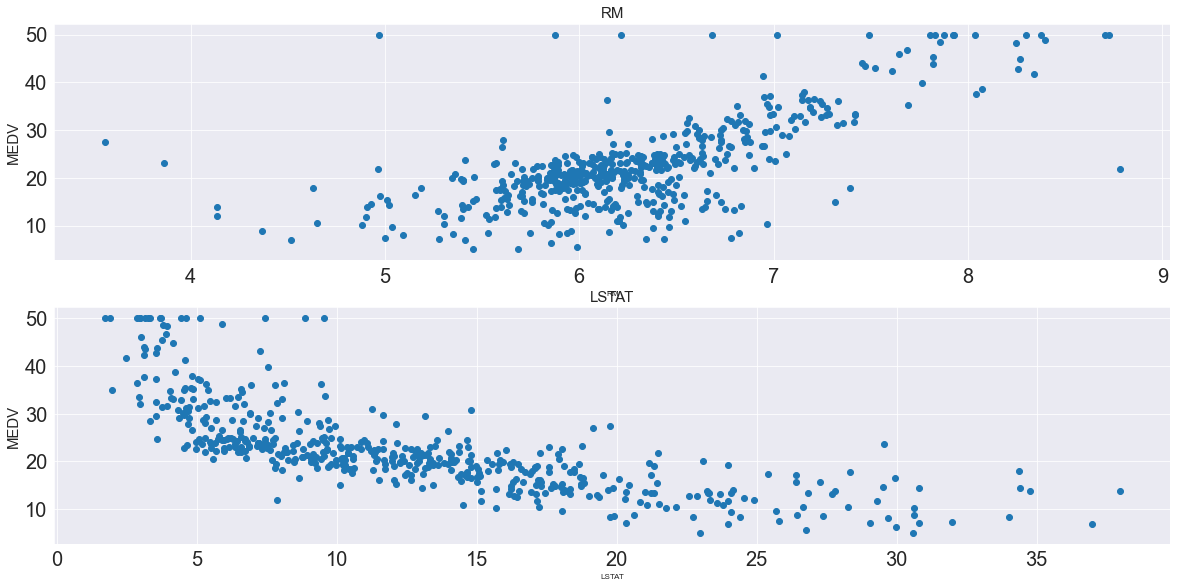

In [180]:
# Create multiple plots
features = bos.drop(['CRIM', 'INDUS', 'NOX','AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B','MEDV'],axis=1).columns
target = bos['MEDV']
plt.figure(figsize=(20,20))
for index, feature_name in enumerate(features):
    # 4 rows of plots, 13/3 == 4 plots per row, index+1 where the plot begins
    plt.subplot(4,len(features)/2, index+1)
    plt.scatter(bos[feature_name], target)
    plt.title(feature_name, fontsize=15)
    plt.xlabel(feature_name, fontsize=8) #Removed for easier view of plots
    plt.ylabel('MEDV', fontsize=15)


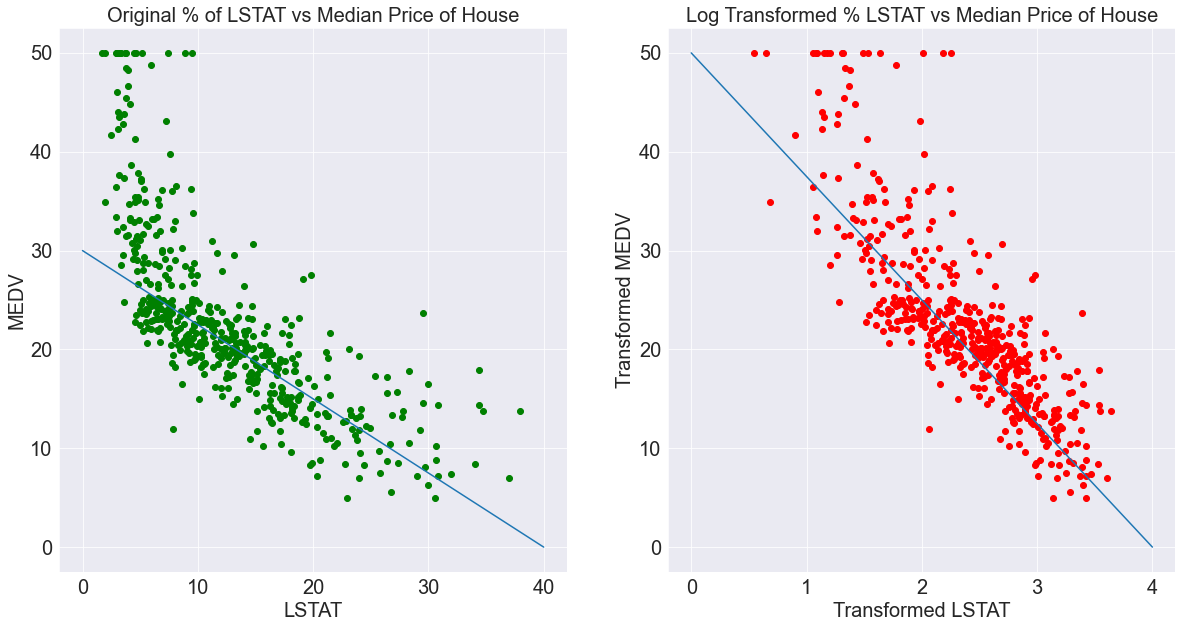

In [181]:
import numpy as np
bos["LOGLSTAT"] = bos["LSTAT"].apply(np.log)
plt.figure(figsize=(20,10))

# showing plot 1
plt.subplot(1,2,1)
plt.scatter(bos["LSTAT"], bos['MEDV'], color='green')
plt.title('Original % of LSTAT vs Median Price of House', fontsize= 20)
plt.xlabel('LSTAT',fontsize=20);
plt.ylabel('MEDV',fontsize=20);
plt.plot([0,40],[30,0])

# showing plot 2
plt.subplot(1,2,2)
plt.scatter(bos["LOGLSTAT"], bos['MEDV'], color='red')
plt.title('Log Transformed % LSTAT vs Median Price of House', fontsize= 20)
plt.xlabel('Transformed LSTAT',fontsize=20);
plt.ylabel('Transformed MEDV',fontsize=20);
plt.plot([0,4],[50,0])


#Apply global parameters
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

plt.show()


In [182]:
X=bos[['RM','LOGLSTAT']]
y=bos['MEDV']

In [184]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [185]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [186]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [187]:
lrmodel=lr()
lrmodel.fit(X_train,y_train)

LinearRegression()

In [188]:
train_predict=lrmodel.predict(X_train)
test_predict=lrmodel.predict(X_test)

In [189]:
print(lrmodel.score(X_train,y_train))

0.7166838321083889


In [190]:
print("Train R square error {}".format(r2_score(y_train,train_predict)))

Train R square error 0.7166838321083889


In [193]:
def adj_r2(x,y):
    r2 = lrmodel.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [194]:
print(lrmodel.score(X_test,y_test))
print(adj_r2(X_test,y_test))

0.671777372631674
0.6673716997810925


In [195]:
from sklearn.preprocessing import PolynomialFeatures
polyRegressor = PolynomialFeatures(degree=2)
X_train_poly = polyRegressor.fit_transform(X_train)
X_test_poly = polyRegressor.fit_transform(X_test)
poly = lr()
poly.fit(X_train_poly, y_train)
Y_pred = poly.predict(X_test_poly)
Y_compare_poly = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
Y_compare_poly.head() #displaying the comparision btween actual and predicted values of MEDV


,Actual,Predicted
173,23.6,23.840656
274,32.4,34.033728
491,13.6,15.871600
72,22.8,27.322202
452,16.1,16.855424


In [89]:
X_test_poly[0]

array([ 1.        ,  7.48364564,  1.01599907,  1.11749449,  0.31024714,
        1.4475658 , 56.00495206,  7.60337702,  8.36293273,  2.32177964,
       10.83306946,  1.03225411,  1.13537336,  0.3152108 ,  1.4707255 ,
        1.24879392,  0.34669947,  1.61764679,  0.09625329,  0.44910314,
        2.09544673])

In [211]:
print(poly.score(X_test_poly,y_test))


0.7546281471518934


In [205]:
X_test_poly.shape

(152, 6)

In [206]:
y_test.shape

(152,)

In [212]:
import pickle
filename = 'botson_model.pickle'
pickle.dump(poly, open(filename, 'wb'))
file_reg='botsonregressor.pickle'
pickle.dump(polyRegressor, open(file_reg, 'wb'))
# prediction using the saved model.
loaded_model = pickle.load(open(filename, 'rb'))
load_regressor=pickle.load(open(file_reg,'rb'))

In [215]:
predict_loaded=loaded_model.predict(load_regressor.fit_transform([[6.575,4.98]]))
print(predict_loaded[0])

17.49469341080277


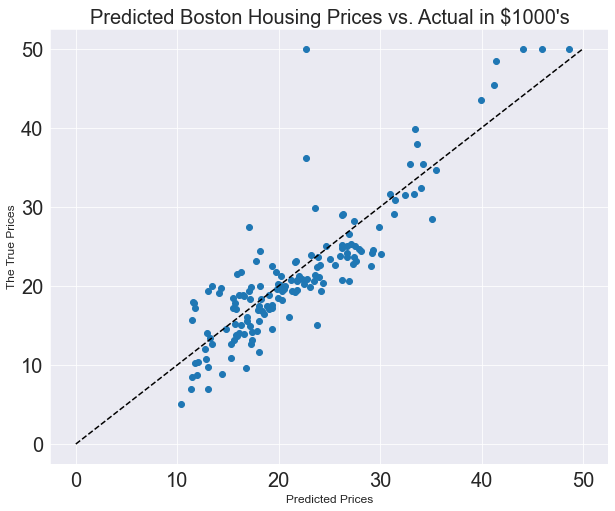

In [222]:
plt.figure(figsize=(10,8))
plt.scatter(Y_compare_poly['Predicted'],Y_compare_poly['Actual'] )
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('The True Prices', fontsize=12);


plt.xlabel('Predicted Prices', fontsize=12);
plt.title("Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()